<a href="https://colab.research.google.com/github/SpringBoardMentor193s/SentinelNet_Oct_Batch/blob/Sanjushree/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy matplotlib

In [ ]:
!pip install seaborn

In [ ]:
column_names = [
    'duration', 'protocol_type', 'service', 'flag',
    'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
    'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
    'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
    'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label', 'difficulty'
]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


train_df = pd.read_csv(
    r"/content/KDDTrain+.txt",
    header=None,
    names=column_names
)


train_df.drop(['difficulty'], axis=1, inplace=True)

# Load the testing data
test_df = pd.read_csv(
    r"/content/KDDTest+.txt",
    header=None,
    names=column_names
)



test_df.drop(['difficulty'], axis=1, inplace=True)


print("Training Data")
print(f"Shape: {train_df.shape}")
print(train_df.head())

print("\n--- Testing Data ---")
print(f"Shape: {test_df.shape}")
print(test_df.head())

Training Data
Shape: (125973, 42)
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                  

In [ ]:

attack_counts = train_df['label'].value_counts().reset_index()
attack_counts.columns = ['attack_type', 'count']


print(attack_counts)


        attack_type  count
0            normal  67343
1           neptune  41214
2             satan   3633
3           ipsweep   3599
4         portsweep   2931
5             smurf   2646
6              nmap   1493
7              back    956
8          teardrop    892
9       warezclient    890
10              pod    201
11     guess_passwd     53
12  buffer_overflow     30
13      warezmaster     20
14             land     18
15             imap     11
16          rootkit     10
17       loadmodule      9
18        ftp_write      8
19         multihop      7
20              phf      4
21             perl      3
22              spy      2


In [ ]:

train_df['binary'] = train_df['label'].apply(lambda x: 0 if x == 'normal' else 1)
test_df['binary'] = test_df['label'].apply(lambda x: 0 if x == 'normal' else 1)


train_df.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,binary
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0


/tmp/ipython-input-1173553002.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='label', order=train_df['label'].value_counts().index, palette='pastel')


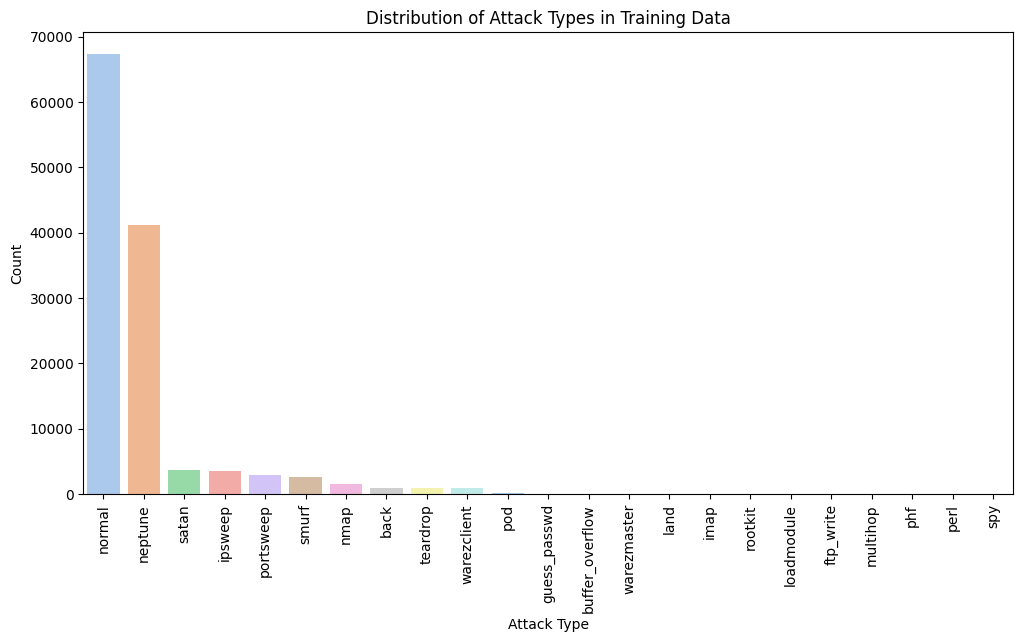


Normal vs Attack Counts:
binary
0    67343
1    58630
Name: count, dtype: int64


In [ ]:

plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='label', order=train_df['label'].value_counts().index, palette='pastel')
plt.xticks(rotation=90)
plt.title('Distribution of Attack Types in Training Data')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()


attack_counts = train_df['binary'].value_counts()
print("\nNormal vs Attack Counts:")
print(attack_counts)


In [ ]:
print("🔍 Null Values in Training Data:")
print(train_df.isnull().sum())

🔍 Null Values in Training Data:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_ra

In [ ]:
train_df.duplicated().sum()

np.int64(0)

In [ ]:
train_df.shape


(125973, 43)

<Figure size 2000x4000 with 0 Axes>

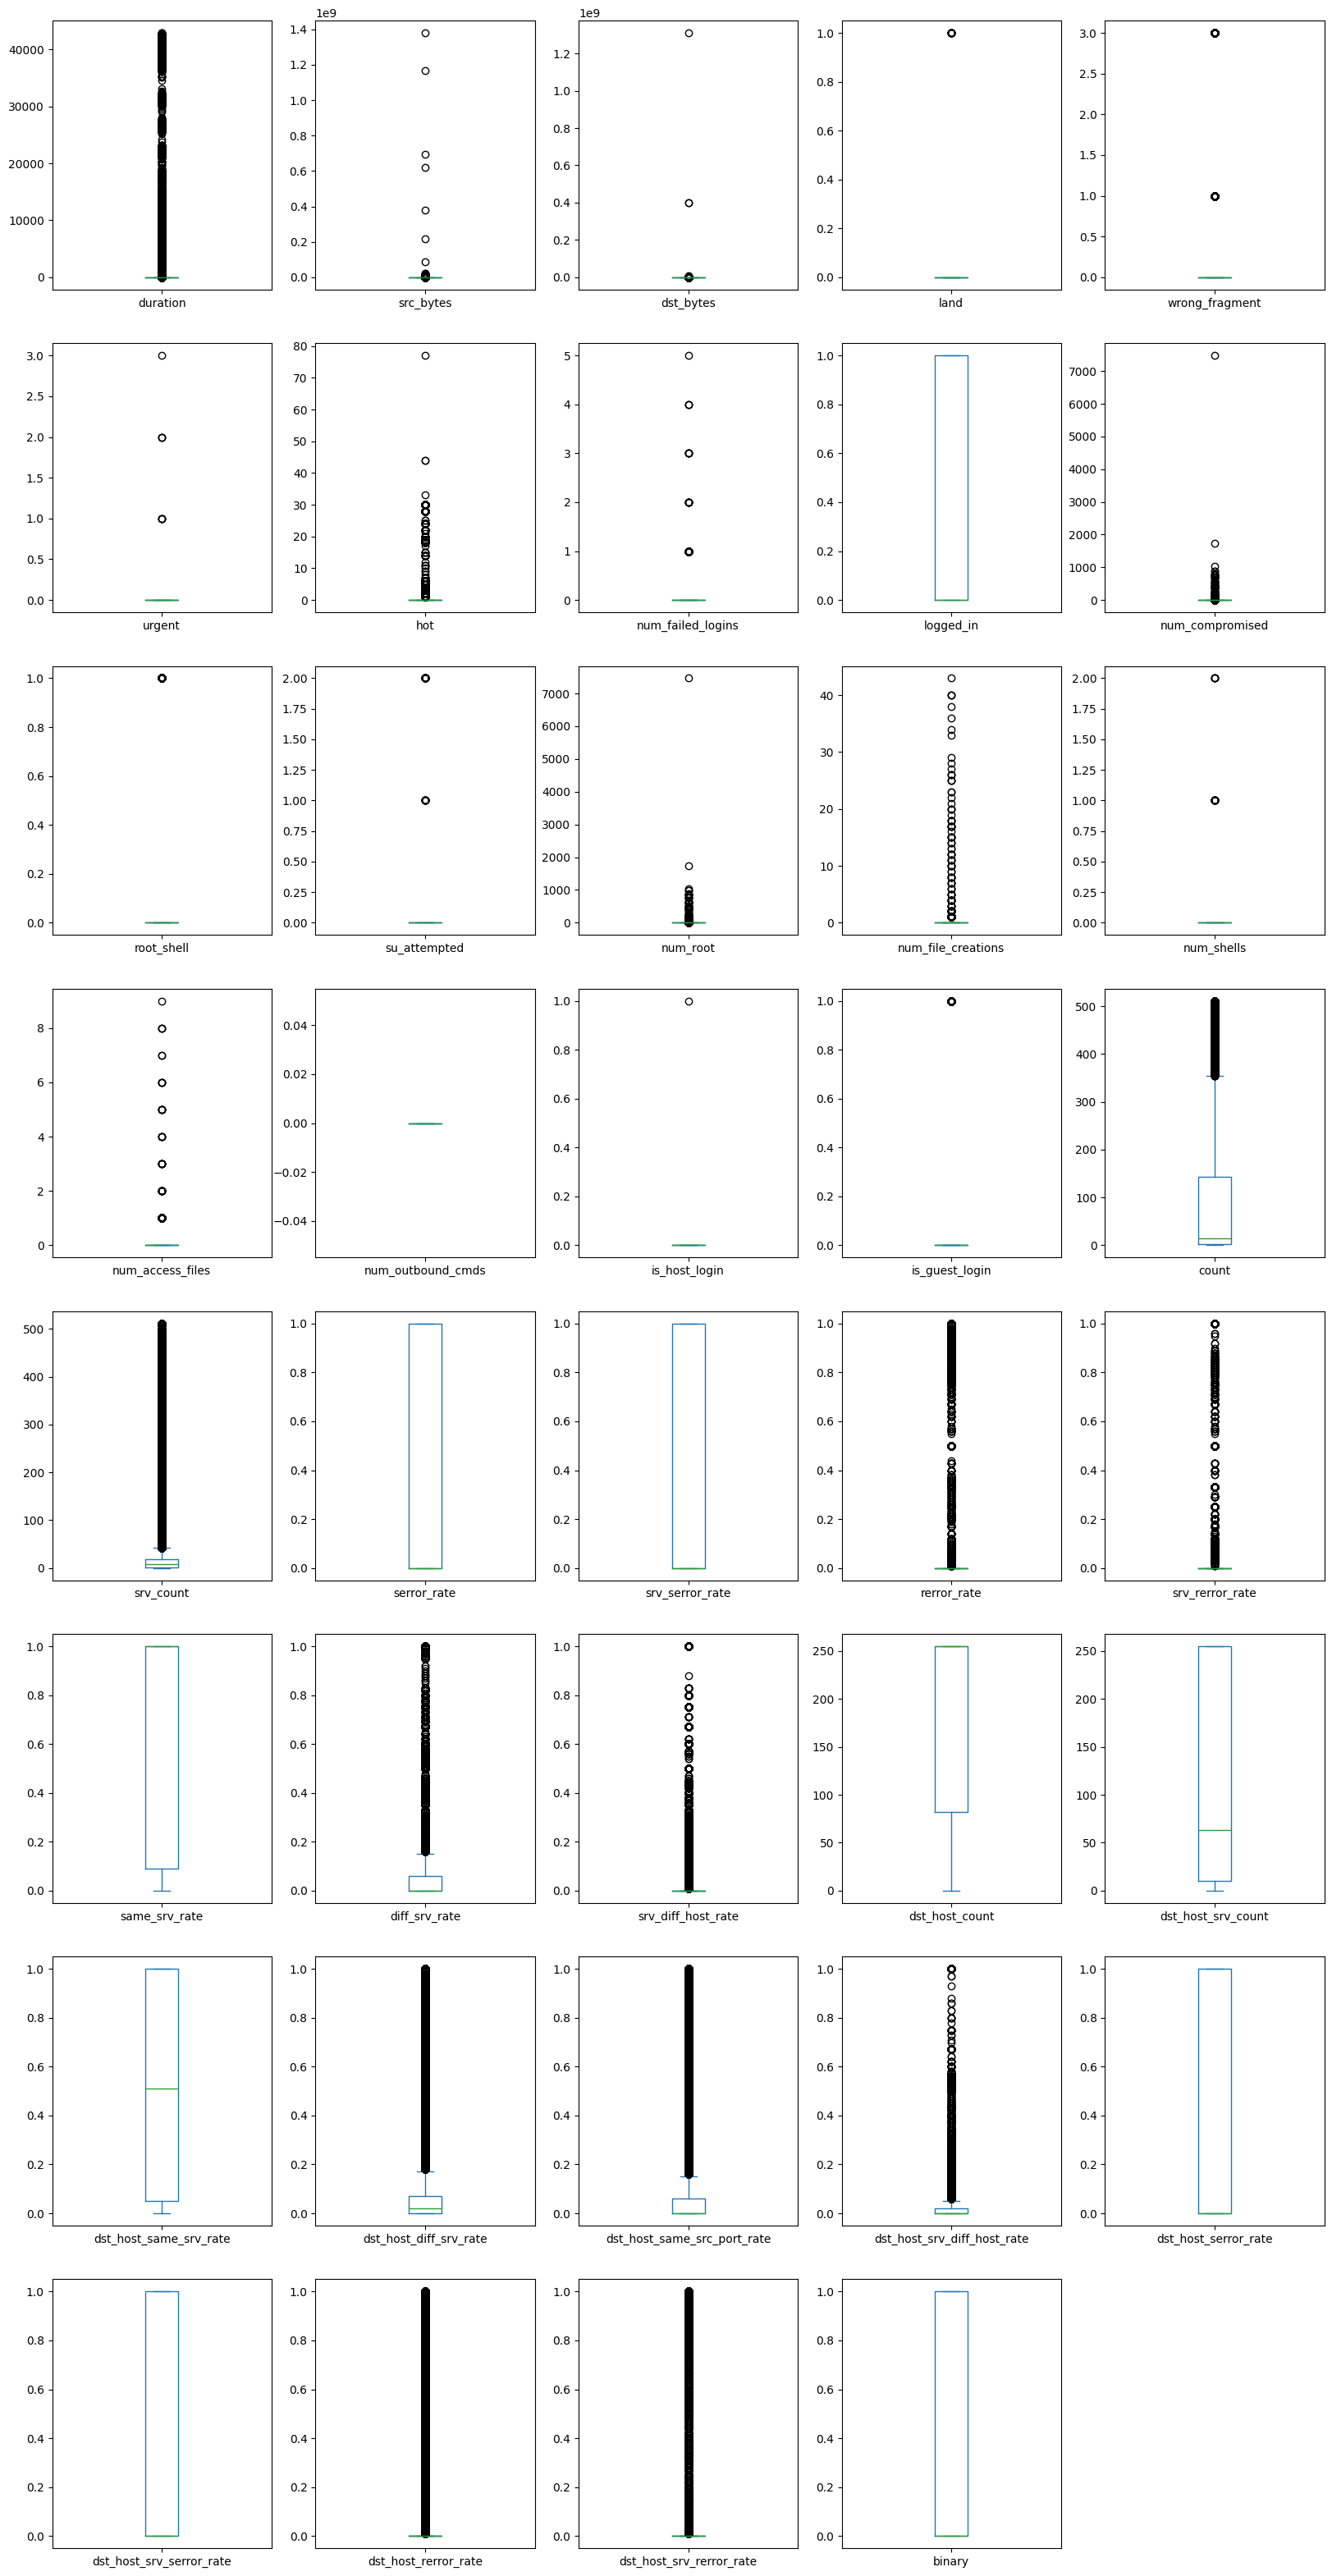

In [ ]:
plt.figure(figsize=(20, 40))
train_df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

In [ ]:
attack_n = []
for i in train_df['label']:
    if i == 'normal':
        attack_n.append("normal")
    else:
        attack_n.append("attack")

train_df['attack'] = attack_n


In [ ]:
print(train_df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label', 'binary', 'attack'],
      dtype='object')


In [ ]:
train_df['attack'].unique()


array(['normal', 'attack'], dtype=object)

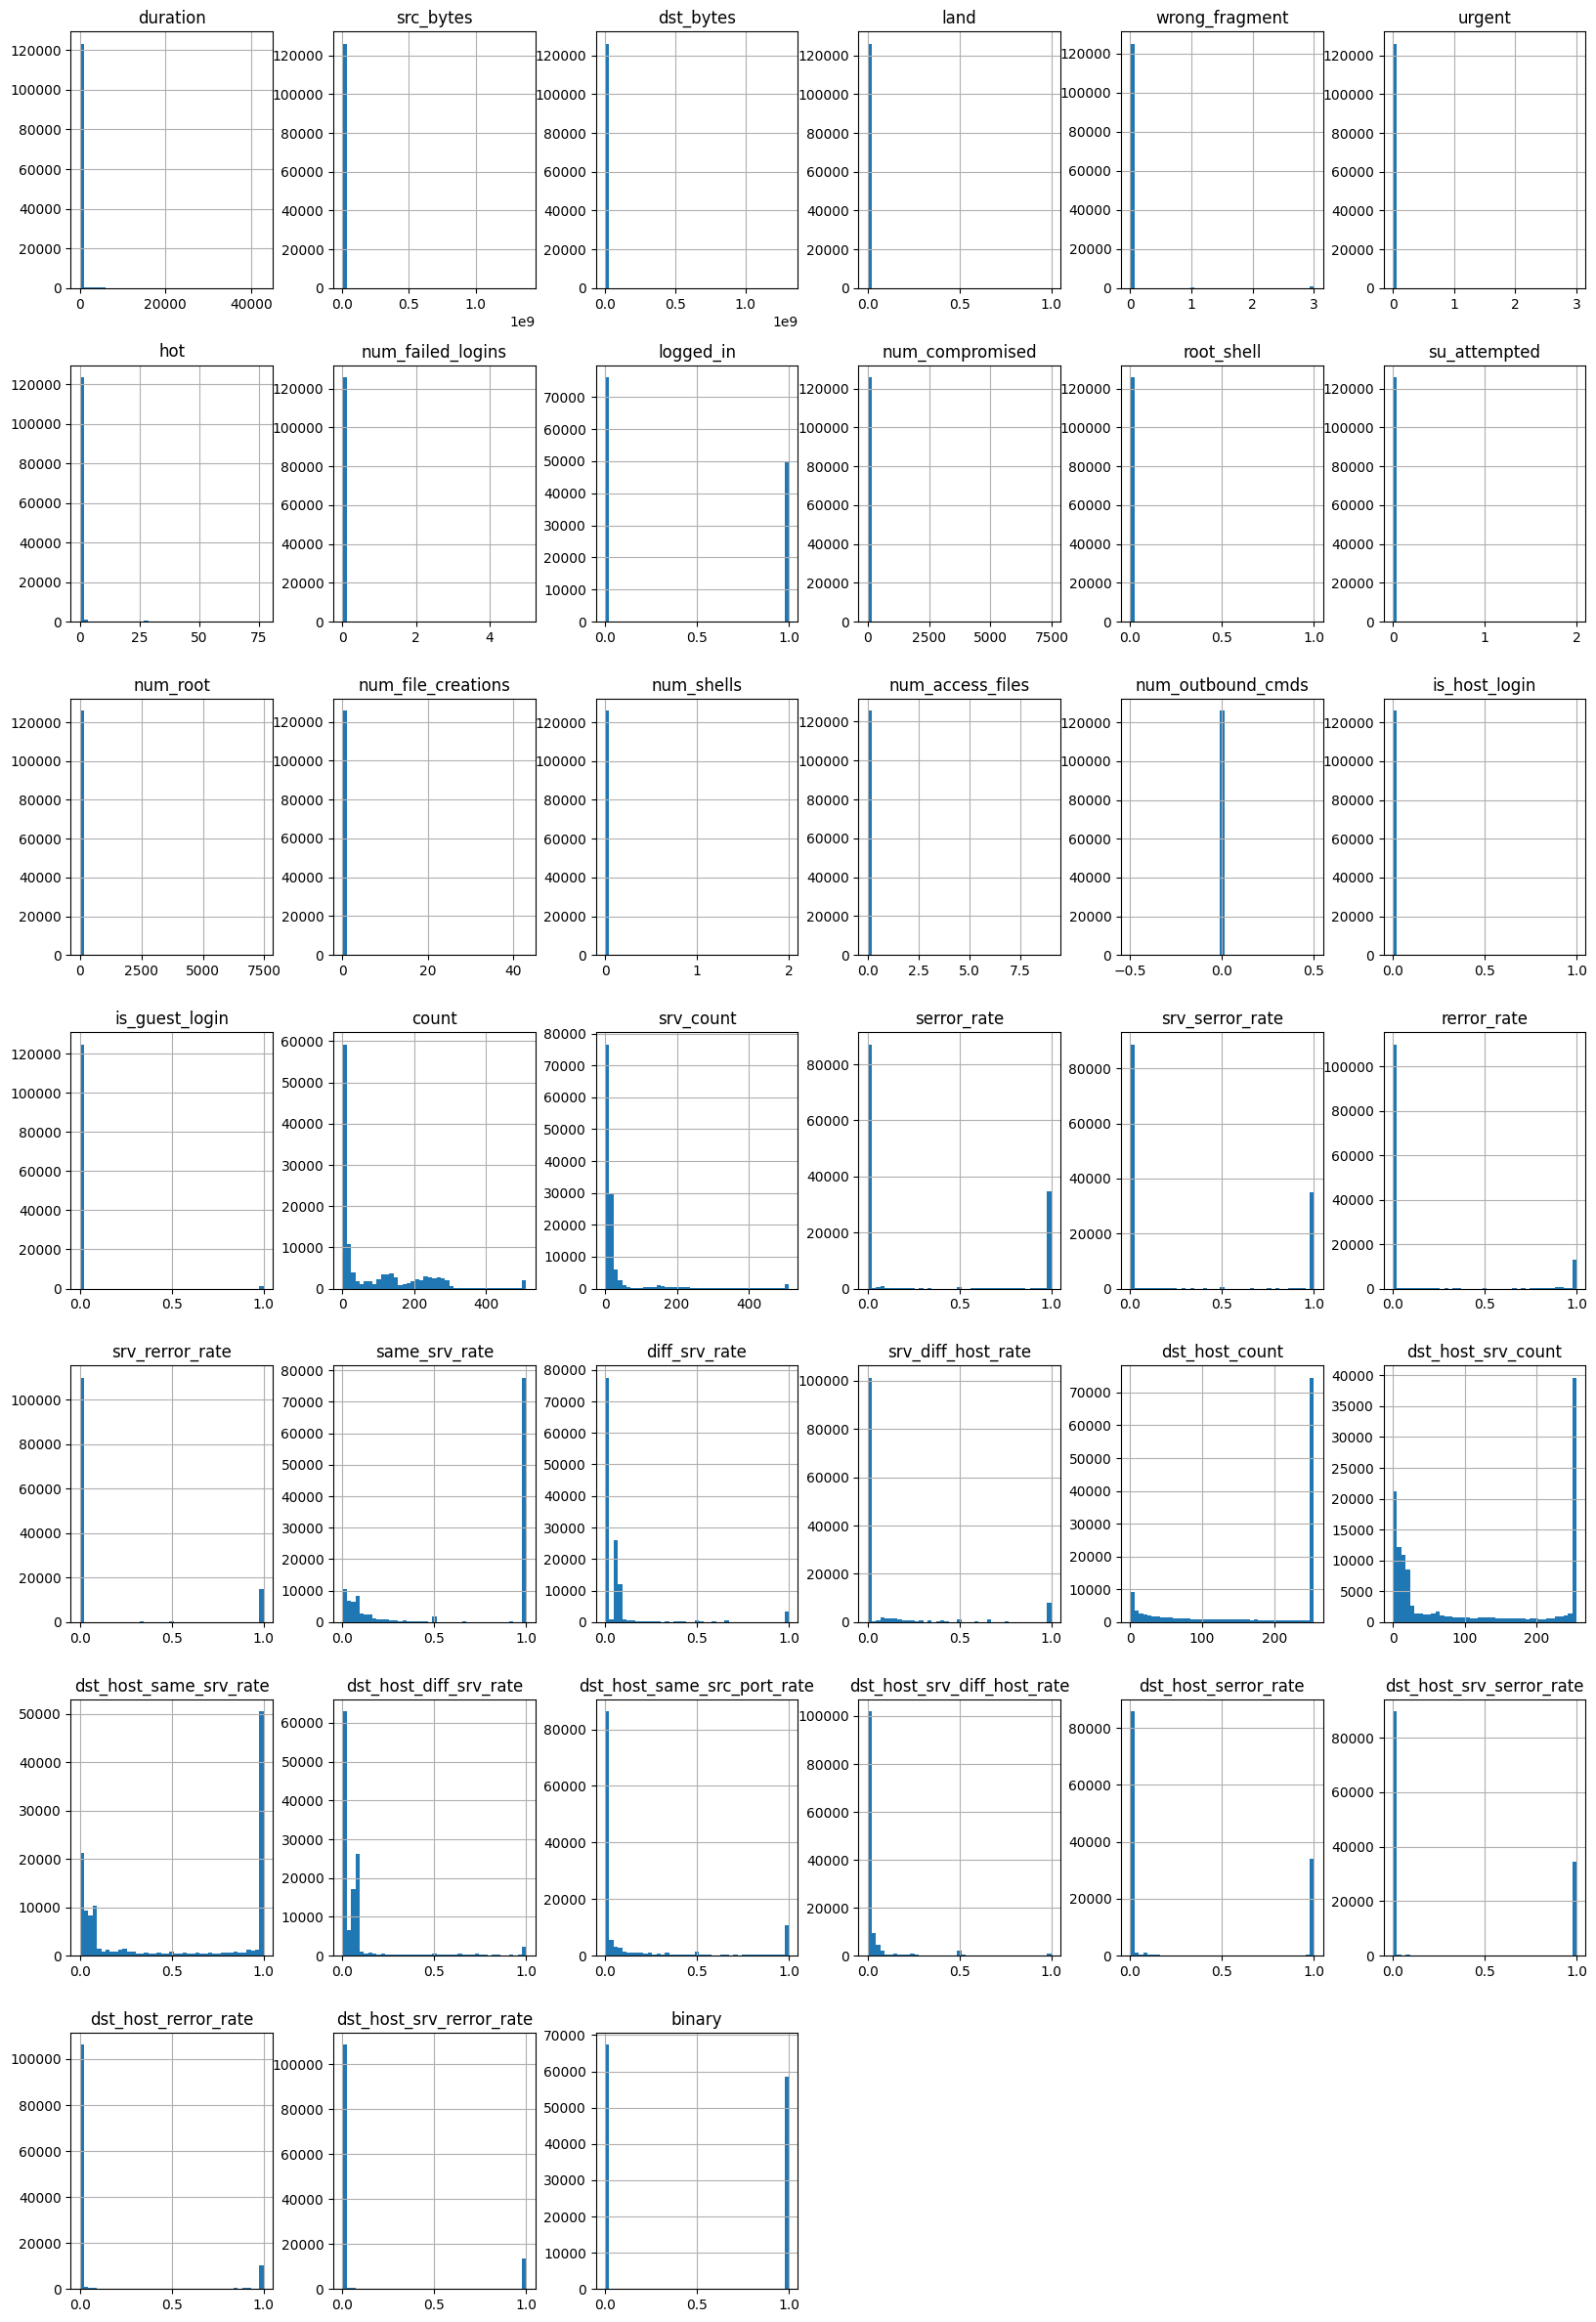

In [ ]:
train_df.hist(bins=43,figsize=(20,30));

In [ ]:
# Identify categorical columns
categorical_cols = ['protocol_type', 'service', 'flag']

# Perform one-hot encoding on both train and test sets
train_encoded = pd.get_dummies(train_df, columns=categorical_cols)
test_encoded = pd.get_dummies(test_df, columns=categorical_cols)

# Align both dataframes to ensure same columns
train_encoded, test_encoded = train_encoded.align(test_encoded, join='inner', axis=1)

print("✅ Encoding Complete")
print(f"Train Encoded Shape: {train_encoded.shape}")
print(f"Test Encoded Shape: {test_encoded.shape}")


✅ Encoding Complete
Train Encoded Shape: (125973, 118)
Test Encoded Shape: (22544, 118)


In [ ]:
# Check for any mismatch in columns
train_cols = set(train_encoded.columns)
test_cols = set(test_encoded.columns)

missing_in_test = train_cols - test_cols
missing_in_train = test_cols - train_cols

if not missing_in_test and not missing_in_train:
    print("✅ Train and Test Columns are Consistent.")
else:
    print("⚠️ Inconsistencies Found!")
    print("Missing in Test:", missing_in_test)
    print("Missing in Train:", missing_in_train)


✅ Train and Test Columns are Consistent.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X_train = train_encoded.drop(columns=[col for col in ['label', 'binary', 'attack'] if col in train_encoded.columns])
y_train = train_encoded['binary']

X_test = test_encoded.drop(columns=[col for col in ['label', 'binary', 'attack'] if col in test_encoded.columns])
y_test = test_encoded['binary']

# Scale numerical features
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("✅ Preprocessing Complete")
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)


✅ Preprocessing Complete
Train Shape: (125973, 116)
Test Shape: (22544, 116)



🔹 Logistic Regression
Accuracy: 0.7537704045422285
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.93      0.76      9711
           1       0.92      0.62      0.74     12833

    accuracy                           0.75     22544
   macro avg       0.78      0.77      0.75     22544
weighted avg       0.80      0.75      0.75     22544



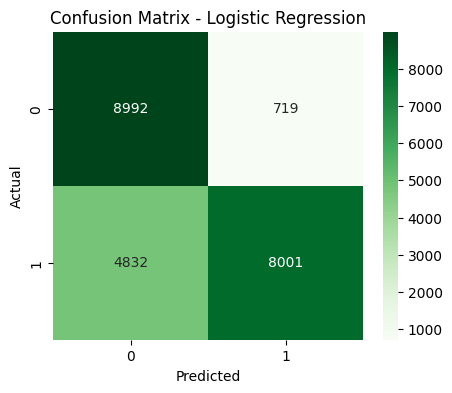


🔹 SVM (Linear Kernel)
Accuracy: 0.7528388928317956
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.92      0.76      9711
           1       0.92      0.62      0.74     12833

    accuracy                           0.75     22544
   macro avg       0.78      0.77      0.75     22544
weighted avg       0.80      0.75      0.75     22544



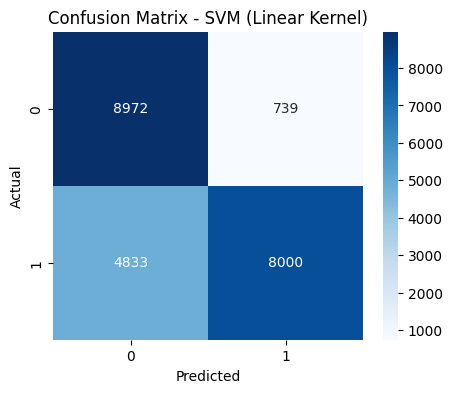


🔹 SVM (Polynomial Kernel)
Accuracy: 0.7634847409510291
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.97      0.78      9711
           1       0.97      0.61      0.74     12833

    accuracy                           0.76     22544
   macro avg       0.81      0.79      0.76     22544
weighted avg       0.83      0.76      0.76     22544



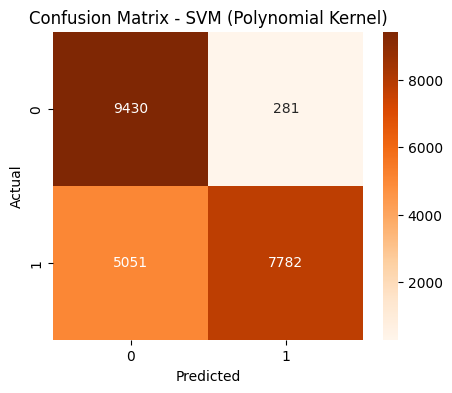


🔹 SVM (RBF Kernel)
Accuracy: 0.7720901348474095
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.97      0.79      9711
           1       0.96      0.62      0.76     12833

    accuracy                           0.77     22544
   macro avg       0.81      0.80      0.77     22544
weighted avg       0.83      0.77      0.77     22544



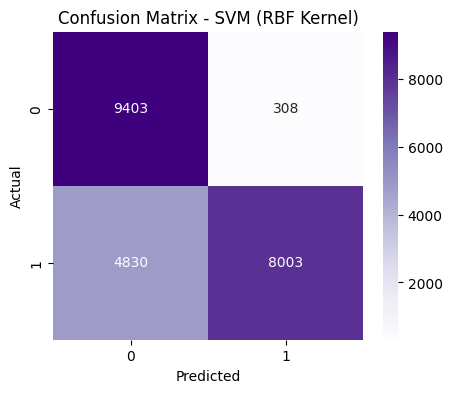


✅ Model evaluation completed successfully!


In [ ]:
# ---------------------------------------
# 📘 MACHINE LEARNING MODELS ON NSL-KDD
# ---------------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression
print("\n🔹 Logistic Regression")
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# SVM (Linear Kernel)
print("\n🔹 SVM (Linear Kernel)")
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svm_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_linear))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm_linear), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM (Linear Kernel)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# SVM (Polynomial Kernel)
print("\n🔹 SVM (Polynomial Kernel)")
svm_poly = SVC(kernel='poly')
svm_poly.fit(X_train, y_train)
y_pred_svm_poly = svm_poly.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svm_poly))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_poly))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm_poly), annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - SVM (Polynomial Kernel)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# SVM (RBF Kernel)
print("\n🔹 SVM (RBF Kernel)")
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svm_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_rbf))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm_rbf), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - SVM (RBF Kernel)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\n✅ Model evaluation completed successfully!")
